# Automatic Number Plate Recognition

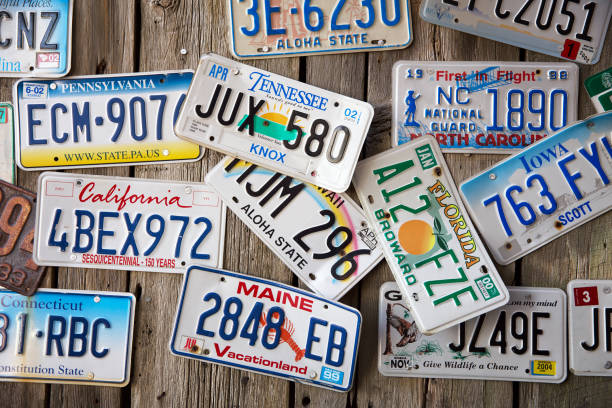

### In this notebook we will perform ANPR using yolo v8 for license plate detection and easyocr to extract the license plate
### our dtatser is the kaggle ANPR

In [4]:
## understandaing the dataset:vdfvfev
# our dataset is composed of
!pip install --upgrade opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.64
    Uninstalling opencv-python-4.5.5.64:
      Successfully uninstalled opencv-python-4.5.5.64


In [1]:
import cv2
import matplotlib.pyplot as plt


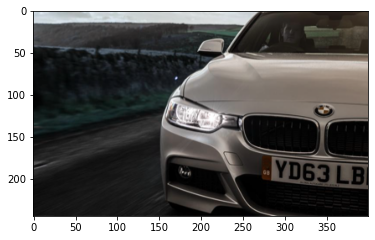

In [2]:
PATH = "train/images/cars31.png"

img = cv2.imread(PATH)
plt.imshow(img)
plt.show()

In [9]:
## now we need to convert our annotations files format from PASCAL VOC to darknet

In [10]:
def xml_to_yolo(bbox, w, h):
    # xmin, ymin, xmax, ymax
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

In [11]:
import xml.etree.ElementTree as ET
import os


for filename in os.listdir("annotations"):
    
    tree = ET.parse(f"annotations/{filename}")
    root = tree.getroot()
    name = root.find("filename").text.replace(".png","")
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        box = []
        for x in obj.find("bndbox"):
            box.append(int(x.text))

        yolo_box = xml_to_yolo(box,width,height)
        line = f"0 {yolo_box[0]} {yolo_box[1]} {yolo_box[2]} {yolo_box[3]}"

        with open(f"annotations_yolo/{name}.txt", "a") as file:
          # Write a line to the file
          file.write(f"{line}\n")


# Training the model 

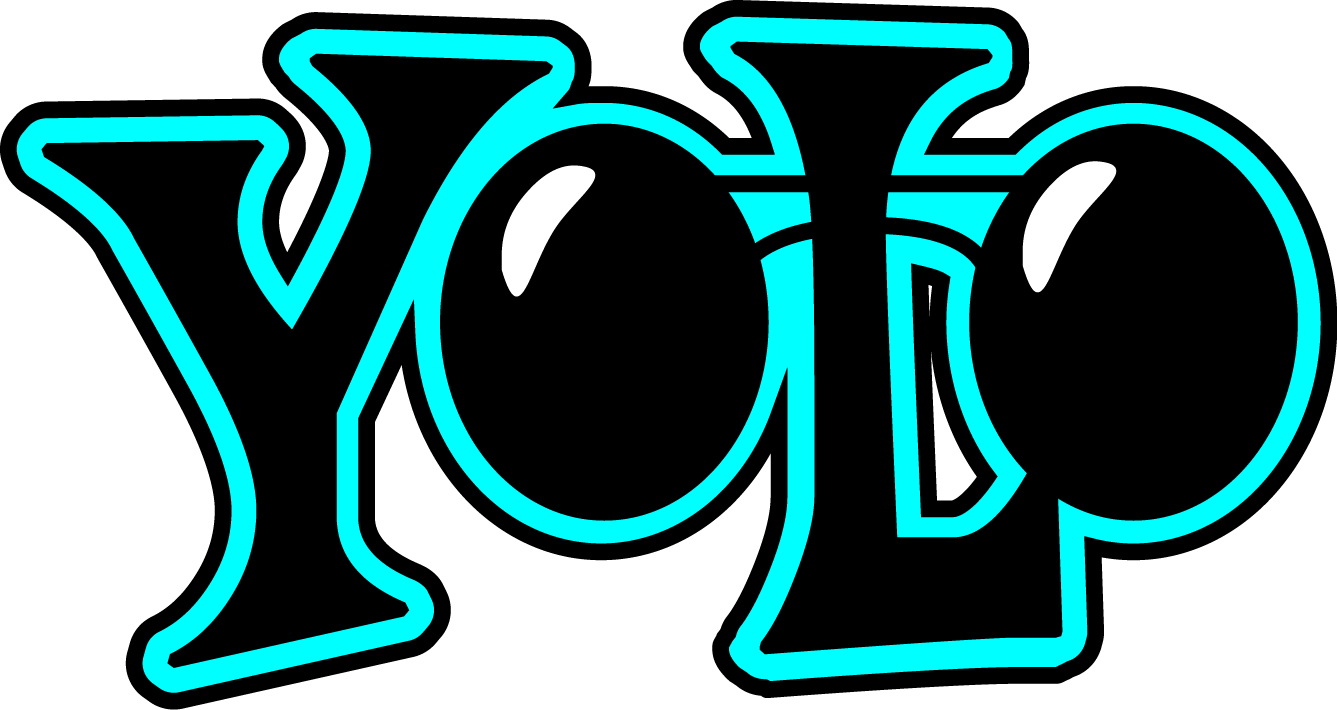

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml') 


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [4]:
model

In [5]:
model.train(data="config.yaml",device="0",epochs=50,verbose=True,plots=True,save=True)

Ultralytics YOLOv8.0.84  Python-3.8.8 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti with Max-Q Design, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False,


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/50      2.28G      2.814      2.689      2.869          2        640: 100%|██████████| 26/26 [00:24<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         32         34      0.156      0.147     0.0779     0.0211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/50      2.28G      2.768      2.654      2.812          3        640: 100%|██████████| 26/26 [00:24<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         32         34      0.211      0.294      0.135     0.0295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/50       2.3G      2.698      2.547      2.722          2        640: 100%|██████████| 26/26 [00

      28/50      2.28G      1.915      1.427      1.951          3        640: 100%|██████████| 26/26 [00:26<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         32         34      0.825      0.853      0.881      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/50      2.28G      1.854      1.318      1.925          5        640: 100%|██████████| 26/26 [00:26<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         32         34      0.739      0.916      0.884       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/50      2.28G      1.835      1.365      1.887          3        640: 100%|██████████| 26/26 [00:27<00:00,  1.
                 Class     Images  Instances      Box(P         

      48/50      2.28G      1.556      1.059      1.688          2        640: 100%|██████████| 26/26 [00:25<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0
                   all         32         34      0.893      0.971      0.975      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      49/50      2.28G      1.519      1.039      1.651          4        640: 100%|██████████| 26/26 [00:25<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0
                   all         32         34      0.917      0.971      0.986      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      50/50      2.28G      1.639      1.086      1.749          1        640: 100%|██████████| 26/26 [00:25<00:00,  1.
                 Class     Images  Instances      Box(P         

In [59]:
result = model.predict(source="test_images/2.jpg",save=True)



image 1/1 C:\Users\msi\ML\ANPR\test_images\2.jpg: 416x640 1 license plate, 75.0ms
Speed: 3.0ms preprocess, 75.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


In [60]:
x = result[0].boxes.xyxy.cpu().numpy().astype(int)
x[0]

array([453, 328, 702, 396])

In [8]:
import os

VIDEOS_DIR = os.path.join('.', 'test_videos')

video_path = os.path.join(VIDEOS_DIR, '1.mp4')
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

threshold = 0.5

class_name_dict = {0: 'license plate'}

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, class_name_dict[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 2 license plates, 70.8ms
Speed: 501.6ms preprocess, 70.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 23.0ms
Speed: 2.0ms preprocess, 23.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 9.0ms
Speed: 1.0ms preprocess, 9


0: 384x640 2 license plates, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 2.0ms


0: 384x640 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 12.0ms
Speed: 0.0ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 13.0ms
Speed: 0.0ms preprocess, 13.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 0.0ms preprocess, 10.0ms


0: 384x640 2 license plates, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 11.0ms
Speed: 0.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 1.0ms preprocess, 10.0ms i


0: 384x640 2 license plates, 36.0ms
Speed: 2.0ms preprocess, 36.0ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 17.0ms
Speed: 1.0ms preprocess, 17.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 17.0ms
Speed: 1.0ms preprocess, 17.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 0.0ms preprocess,


0: 384x640 3 license plates, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 license plates, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 10.0ms
Speed: 0.0ms preprocess, 


0: 384x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 10.1ms
Speed: 0.9ms preprocess, 10.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inf


0: 384x640 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 13.0ms
Speed: 0.0ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 10.0ms
Speed: 0.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 11.0ms
Speed: 1.0ms preprocess, 11.0ms

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


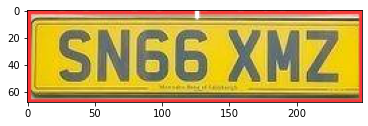

In [61]:
from PIL import Image
import numpy as np

# Load the original image
img = Image.open("runs/detect/predict/2.jpg")

# Get the bounding box coordinates in the format [xmin, ymin, xmax, ymax]
bbox = result[0].boxes.xyxy.cpu().numpy().astype(int)

# Crop the image using the bounding box coordinates
cropped_img = img.crop(bbox[0])
cropped_img.save("test_images/cropped2.jpg")

plt.imshow(cropped_img)
plt.show()

In [62]:
import easyocr

reader = easyocr.Reader(['en'],gpu = True)
ocr_result = reader.readtext("test_images/cropped2.jpg")
print(ocr_result)

[([[16, 6], [240, 6], [240, 62], [16, 62]], 'SN66 XMZ', 0.9672836745911886)]
